In [1]:
import numpy as np
import sys
sys.path.append('..')
from utils.DataEngine import LogInterpreter
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('/home/felix/Dev/Prosperity/data2024/round-2-island-data-bottle/prices_round_2_day_1.csv', sep=";")
df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1
1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1
2,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1
3,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1
4,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1
...,...,...,...,...,...,...,...,...
9996,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490,1
9997,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530,1
9998,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,1
9999,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780,1


In [91]:
df.set_index('timestamp', inplace=True)

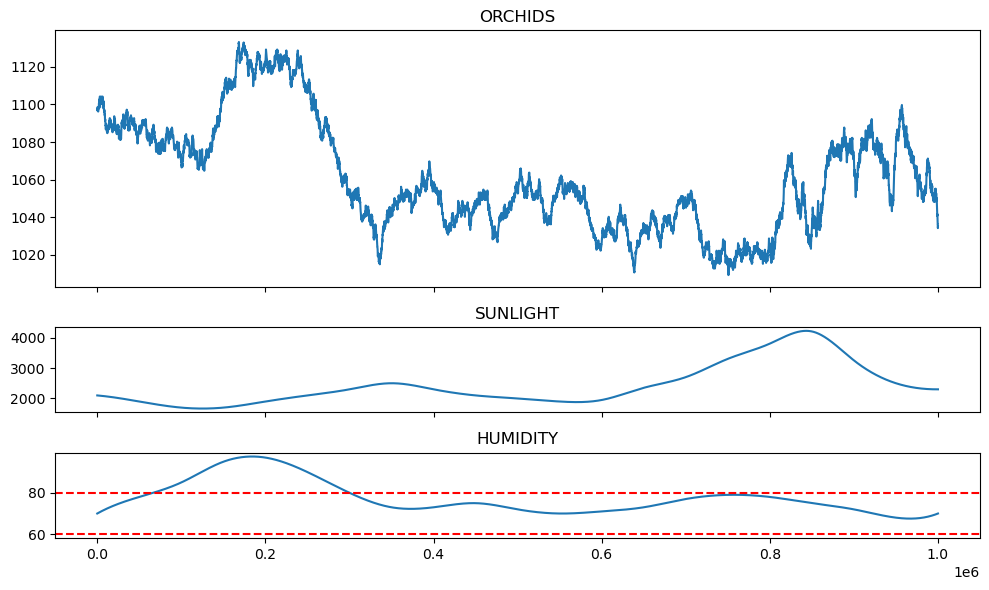

In [92]:
def plot_orchids_sunlight_humidity(df):
    # make first ax larger
    fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1, 1]})
    axs[0].plot(df['ORCHIDS'])
    axs[0].set_title('ORCHIDS')
    axs[1].plot(df['SUNLIGHT'])
    axs[1].set_title('SUNLIGHT')
    axs[2].plot(df['HUMIDITY'])
    axs[2].set_title('HUMIDITY')
    # create dashed line between 60 to 80
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    plt.tight_layout()

plot_orchids_sunlight_humidity(df)

### Notes Round 2

ORCHIDS:

- Influenced

- Sun lt 7h/day => decrease production by 4% per 10 minutes (if i )

- Humidity for orchids to grow between 60 to 80, if outside production will fall 2% per 5 humi
dity points

- shipping costs

- storage space 5000 0.1 seashell per orchid per ts, reverse also true (make 0.1 if short)



In [93]:
logger = LogInterpreter("../logs/arb_log.log")

In [94]:
books = logger.getActivities(as_df = True).loc["ORCHIDS"]


In [95]:
books

,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1094.0,10.0,1093.0,3.0,1086.0,41.0,1102.0,10.0,1104.0,3.0,1111.0,41.0,1098.0,0.000000
100,1094.0,6.0,1093.0,2.0,1087.0,51.0,1102.0,6.0,1103.0,2.0,1110.0,51.0,1098.0,0.000000
200,1093.0,6.0,1092.0,3.0,1085.0,49.0,1101.0,6.0,1102.0,3.0,1108.0,49.0,1097.0,109600.000000
300,1093.0,10.0,1092.0,4.0,1085.0,52.0,1101.0,10.0,1102.0,4.0,1109.0,52.0,1097.0,109600.000000
400,1093.0,10.0,1092.0,3.0,1086.0,51.0,1101.0,10.0,1102.0,3.0,1109.0,51.0,1097.0,109600.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99500,1067.0,5.0,1066.0,4.0,1060.0,43.0,1074.0,5.0,1075.0,4.0,1082.0,43.0,1070.5,111088.679688
99600,1068.0,7.0,1067.0,2.0,1061.0,46.0,1075.0,7.0,1076.0,2.0,1083.0,46.0,1071.5,111088.679688
99700,1068.0,5.0,1067.0,3.0,1061.0,48.0,1076.0,5.0,1077.0,3.0,1083.0,48.0,1072.0,111088.679688
99800,1068.0,8.0,1067.0,3.0,1061.0,49.0,1075.0,8.0,1076.0,3.0,1083.0,49.0,1071.5,111088.679688


In [96]:
df

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
timestamp,,,,,,,
0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1
100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1
200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1
300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1
400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1
...,...,...,...,...,...,...,...
999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490,1
999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530,1
999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,1


In [98]:
join_table = pd.merge(books, df, left_index=True, right_index=True, how='inner')

In [102]:
join_table["mid_price"] = join_table["bid_price_1"]*0.5 + join_table["ask_price_1"]*0.5
join_table["total_ask_vol"] = join_table["ask_volume_1"] + join_table["ask_volume_2"] + join_table["ask_volume_3"]
join_table["total_bid_vol"] = join_table["bid_volume_1"] + join_table["bid_volume_2"] + join_table["bid_volume_3"]
join_table["ask_vwap"] = (join_table["ask_price_1"]*join_table["ask_volume_1"] + join_table["ask_price_2"]*join_table["ask_volume_2"] + join_table["ask_price_3"]*join_table["ask_volume_3"]) / join_table["total_ask_vol"]
join_table["bid_vwap"] = (join_table["bid_price_1"]*join_table["bid_volume_1"] + join_table["bid_price_2"]*join_table["bid_volume_2"] + join_table["bid_price_3"]*join_table["bid_volume_3"]) / join_table["total_bid_vol"]
join_table["spread"] = join_table["ask_price_1"] - join_table["bid_price_1"]

In [120]:
def southIslandPrice(price, tf, et):
    return price + et + tf

def ourIslandPrice(price, tf, it):
    return price + it + tf


<AxesSubplot: >

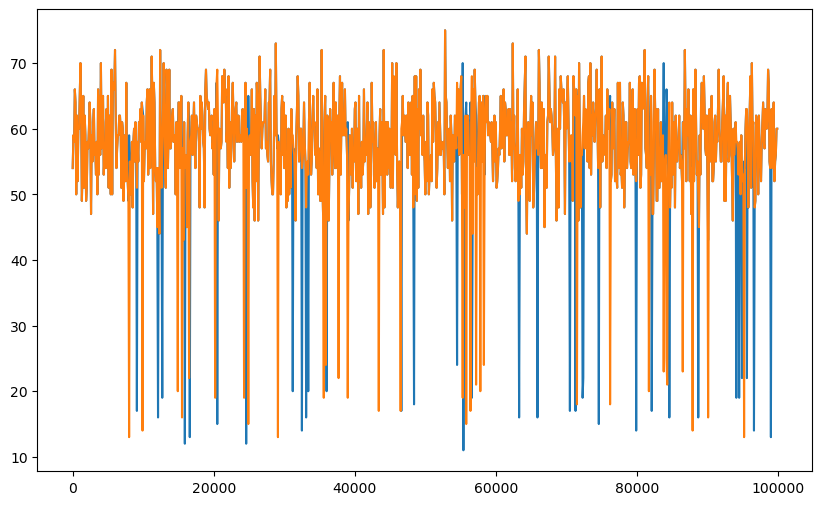

In [121]:
plt.figure(figsize=(10, 6))
join_table["total_ask_vol"].plot()
join_table["total_bid_vol"].plot()

Intersting observations, we get periods with significant low liquidity on both sides

In [122]:
join_table["spread"][(join_table["total_ask_vol"]<40)|(join_table["total_bid_vol"]<40)].mean()

3.707692307692308

In [123]:
join_table["spread"].mean()

7.051

In [135]:
best_ask_to_south_sell = southIslandPrice(join_table["ask_price_1"], join_table["TRANSPORT_FEES"], join_table["EXPORT_TARIFF"])
vwap_ask_to_south_sell = southIslandPrice(join_table["ask_vwap"], join_table["TRANSPORT_FEES"], join_table["EXPORT_TARIFF"])

### Buy on our island and sell on another island

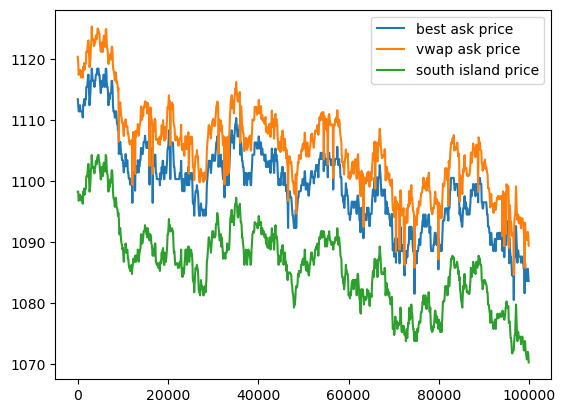

In [136]:
plt.plot(best_ask_to_south_sell, label="best ask price")
plt.plot(vwap_ask_to_south_sell, label="vwap ask price")
plt.plot(join_table["ORCHIDS"], label="south island price")
plt.legend()

In [138]:
join_table[best_ask_to_south_sell < join_table["ORCHIDS"]]

,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,...,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,total_ask_vol,total_bid_vol,ask_vwap,bid_vwap,spread


There is no oppuortunity, unless we want to buy more  

### Sell on our island and buy in the south

In [139]:
south_to_our_long = southIslandPrice(join_table["ORCHIDS"], join_table["TRANSPORT_FEES"], join_table["IMPORT_TARIFF"])
our_to_south_vwap_bid = southIslandPrice(join_table["bid_vwap"], join_table["TRANSPORT_FEES"], join_table["IMPORT_TARIFF"])

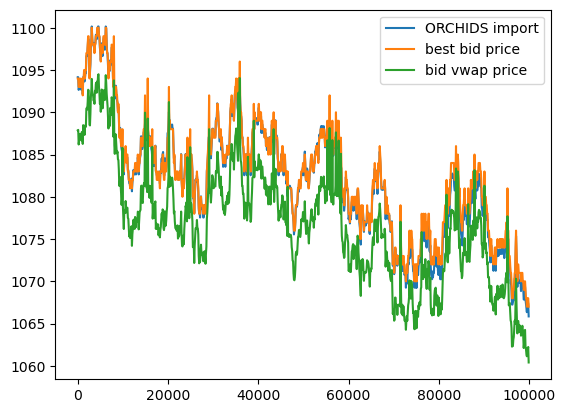

In [140]:
plt.plot(south_to_our_long, label="ORCHIDS import")
plt.plot(join_table["bid_price_1"], label="best bid price")
plt.plot(join_table["bid_vwap"], label="bid vwap price")
plt.legend()

In [141]:
join_table[south_to_our_long < join_table["ORCHIDS"]]

,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,...,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,total_ask_vol,total_bid_vol,ask_vwap,bid_vwap,spread
0,1094.0,10.0,1093.0,3.0,1086.0,41.0,1102.0,10.0,1104.0,3.0,...,10.5,-5.0,2100.0000,70.000000,1,54.0,54.0,1108.944444,1087.870370,8.0
100,1094.0,6.0,1093.0,2.0,1087.0,51.0,1102.0,6.0,1103.0,2.0,...,9.5,-5.0,2099.7570,70.022710,1,59.0,59.0,1108.949153,1087.915254,8.0
200,1093.0,6.0,1092.0,3.0,1085.0,49.0,1101.0,6.0,1102.0,3.0,...,9.5,-5.0,2099.5132,70.045395,1,58.0,58.0,1106.965517,1086.189655,8.0
300,1093.0,10.0,1092.0,4.0,1085.0,52.0,1101.0,10.0,1102.0,4.0,...,9.5,-5.0,2099.2683,70.068030,1,66.0,66.0,1107.363636,1086.636364,8.0
400,1093.0,10.0,1092.0,3.0,1086.0,51.0,1101.0,10.0,1102.0,3.0,...,9.5,-5.0,2099.0225,70.090640,1,64.0,64.0,1107.421875,1087.375000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99500,1067.0,5.0,1066.0,4.0,1060.0,43.0,1074.0,5.0,1075.0,4.0,...,8.5,-5.5,1701.2242,84.906700,1,52.0,52.0,1080.692308,1061.134615,7.0
99600,1068.0,7.0,1067.0,2.0,1061.0,46.0,1075.0,7.0,1076.0,2.0,...,8.5,-5.5,1700.9775,84.925300,1,55.0,55.0,1081.727273,1062.109091,7.0
99700,1068.0,5.0,1067.0,3.0,1061.0,48.0,1076.0,5.0,1077.0,3.0,...,8.5,-5.5,1700.7317,84.943930,1,56.0,56.0,1082.053571,1061.946429,8.0
99800,1068.0,8.0,1067.0,3.0,1061.0,49.0,1075.0,8.0,1076.0,3.0,...,8.5,-5.5,1700.4869,84.962590,1,60.0,60.0,1081.583333,1062.233333,7.0
